## $Test$ $dimension$ $reduction$ $using$ $principal$ $components.$

---

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from skimage import data

from imageio import imread

## $Theory \ldots$

Original image $\mathbf{X} \in \mathbb{R}^{n \times m}$

In [3]:
X = data.camera()
print(f'Original image X has dimensions: {X.shape}')

Original image X has dimensions: (512, 512)


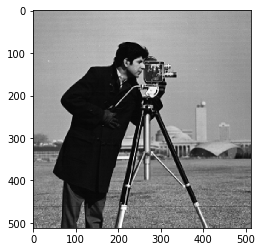

In [4]:
plt.imshow(X, cmap='gray');

Covariance matrix $ \mathbf{\Sigma}_X \in \mathbb{R}^{m \times m}$

In [5]:
cov = np.cov(X.T)
print(f'Dimension of covariance matrix : {cov.shape}')

Dimension of covariance matrix : (512, 512)


Eigendecomposition of $\mathbf{\Sigma_{X}} = \mathbf{V} \mathbf{\Lambda} \mathbf{V}^{-1}$, where $\mathbf{\Lambda} \in \mathbb{R}^{m \times m}$ is the diagonal matrix of eigenvalues and $\mathbf{V} \in \mathbb{R}^{m \times m}$ is the matrix of eigenvectors.

In [6]:
eigenvalues, eigenvectors = np.linalg.eigh(cov)
print(f'Dimensions of eigenvectors: {eigenvectors.shape}')

eigenvalues = eigenvalues[::-1]
eigenvectors = eigenvectors[:,::-1]

Dimensions of eigenvectors: (512, 512)


---

Let $\mathbf{X}$ be the original data matrix, $\mathbf{V}$ be the eigenvector matrix of the convariance matrix for $\mathbf{X}$.

Linear transformation $\mathbf{X}^\prime = \mathbf{X} \mathbf{V}$ $\implies$ original image $\mathbf{X} = \mathbf{X}^\prime \mathbf{V}^{-1} = \mathbf{X}^\prime \mathbf{V}^T = \mathbf{X} \mathbf{V} \mathbf{V}^T$

Define $\mathbf{X}_{r}^\prime := \mathbf{P}_r \mathbf{V}^T_r$ where $\mathbf{V}_r \in \mathbb{R}^{m \times r} \subset \mathbb{R}^{m \times m}$ is the reduced matrix restricted to the first $r$ eigenvectors and $\mathbf{P}_r \in \mathbb{R}^{m \times r} \subset \mathbb{R}^{m \times m}$.

In [7]:
X_prime = X @ eigenvectors @ eigenvectors.T

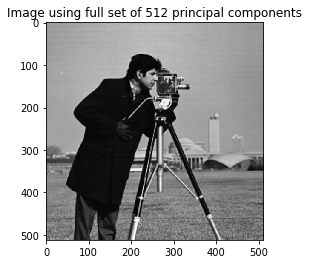

In [8]:
plt.imshow(X_prime, cmap='gray')
plt.title('Image using full set of 512 principal components');

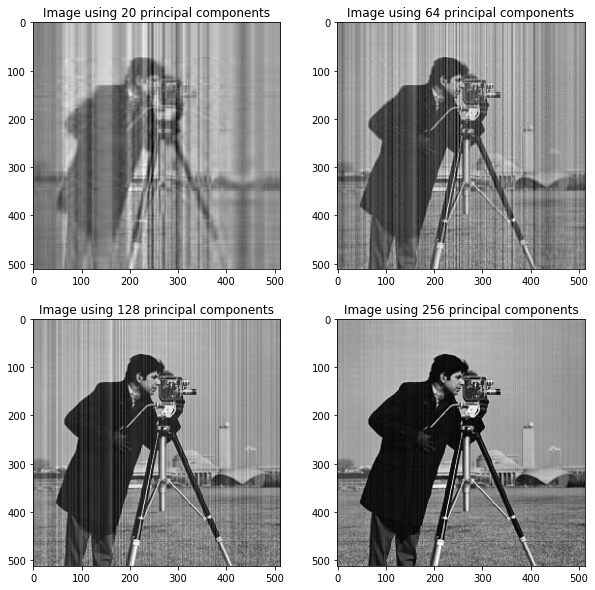

In [9]:
plt.figure(figsize=(10,10))

num_pc = [20, 64, 128, 256]

for idx, n in enumerate(num_pc):
    plt.subplot(2,2,idx+1)
    plt.imshow((X @ eigenvectors)[:,:n-1] @ eigenvectors[:,:n-1].T, cmap='gray')
    plt.title(f'Image using {n} principal components')

## $Comparison$ $with$ $scikit$-$learn$ $\ldots$

In [10]:
pca = PCA(n_components = len(cov), whiten=False, svd_solver='full')
transformation = pca.fit_transform(X)

pca.components_.shape

(512, 512)

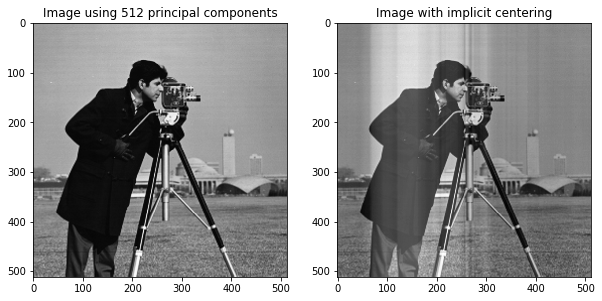

In [11]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow((X @ pca.components_) @ pca.components_.T, cmap='gray')
plt.title('Image using 512 principal components');

plt.subplot(1,2,2)
plt.imshow(transformation @ pca.components_, cmap='gray')
plt.title('Image with implicit centering');

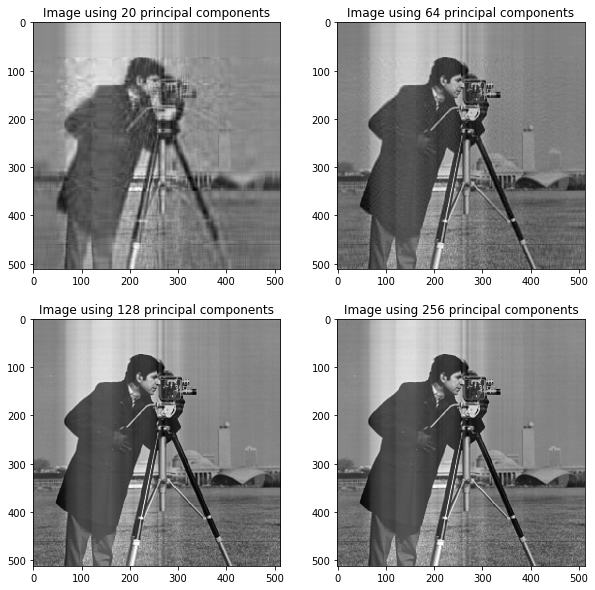

In [12]:
plt.figure(figsize=(10,10))

num_pc = [20, 64, 128, 256]

for idx, n in enumerate(num_pc):
    plt.subplot(2,2,idx+1)
    plt.imshow(transformation[:,:n-1] @ pca.components_[:n-1,:], cmap='gray')
    plt.title(f'Image using {n} principal components')

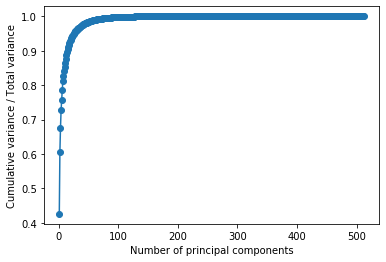

In [13]:
plt.xlabel('Number of principal components'), plt.ylabel('Cumulative variance / Total variance')
plt.plot(np.arange(1, len(cov)+1), np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_), marker='o');

In [14]:
summary_df = pd.DataFrame({'Eigenvalues':pca.explained_variance_}, index=np.arange(1, len(cov)+1))
summary_df['Proportion'] = summary_df/np.sum(summary_df)
summary_df['Cumulative'] = np.cumsum(summary_df['Proportion'])
summary_df.head(10)

,Eigenvalues,Proportion,Cumulative
1,628073.693334,0.425907,0.425907
2,264907.268211,0.179638,0.605545
3,103581.579431,0.070240,0.675785
4,75185.907338,0.050985,0.726770
5,46328.318577,0.031416,0.758186
6,41295.657689,0.028003,0.786190
7,36668.648797,0.024866,0.811055
8,22477.479666,0.015242,0.826297
9,21783.806441,0.014772,0.841069
10,18237.572677,0.012367,0.853437
